In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')   # suppress warnings

#### Data

In [2]:
# train data
df_train = pd.read_csv('Train.csv')
print(df_train.shape)
df_train.head()

(10001, 4)


,tweet_id,safe_text,label,agreement
0,CL1KWCMY,Me &amp; The Big Homie meanboy3000 #MEANBOY #M...,0.0,1.0
1,E3303EME,I'm 100% thinking of devoting my career to pro...,1.0,1.0
2,M4IVFSMS,"#whatcausesautism VACCINES, DO NOT VACCINATE Y...",-1.0,1.0
3,1DR6ROZ4,I mean if they immunize my kid with something ...,-1.0,1.0
4,J77ENIIE,Thanks to <user> Catch me performing at La Nui...,0.0,1.0


In [3]:
# test data
df_test = pd.read_csv('Test.csv')
print(df_test.shape)
df_test.head()

(5177, 2)


,tweet_id,safe_text
0,00BHHHP1,<user> <user> ... &amp; 4 a vaccine given 2 he...
1,00UNMD0E,Students starting school without whooping coug...
2,01AXPTJF,"I'm kinda over every ep of <user> being ""rippe..."
3,01HOEQJW,How many innocent children die for lack of vac...
4,01JUKMAO,"CDC eyeing bird flu vaccine for humans, though..."


### Characteristics

##### test data

In [ ]:
# information 
df_test.info()

In [ ]:
# check for missing values
df_test.isnull().sum()

In [ ]:
# fill the missing values

##### train data

In [ ]:
# information
df_train.info()

In [ ]:
# description
df_train.describe()

In [ ]:
# check the values in target variable
df_train['label'].value_counts()

In [ ]:
# missing values
df_train.isnull().sum()

In [4]:
# fill missing values
# label and aggreement are floating numbers, use mean and round
cols = ['label', 'agreement']
for col in cols:
    print(f'Column: {col}')
    mean_rounded = round(df_train[col].mean())
    print(f'Mean round: {mean_rounded}')
    df_train[col].fillna(mean_rounded, inplace=True)

Column: label
Mean round: 0
Column: agreement
Mean round: 1


In [ ]:
# check for missing values again
df_train.isnull().sum()

In [ ]:
# check the values in target variable again
df_train['label'].value_counts()

In [5]:
# there are some inconsistencies, label values should either be 1, 0, -1

# Check the values in the target variable and handle any inconsistencies
df_train['label'] = df_train['label'].round().astype(int)

# Verify the counts of the target variable after handling inconsistencies
label_counts = df_train['label'].value_counts()
print(label_counts)

label
 0    4909
 1    4054
-1    1038
Name: count, dtype: int64


In [ ]:
# Check for duplicates in the DataFrame
duplicate_rows = df_train[df_train.duplicated()]

# Print duplicate rows if any
if not duplicate_rows.empty:
    print("Duplicate rows found:")
    print(duplicate_rows)
else:
    print("No duplicate rows found.")

In [ ]:
# Checking for outliers

# a function to detect outliers using IQR method
def detect_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (series < lower_bound) | (series > upper_bound)
    return outliers

# Identify outliers in numerical columns
numerical_cols = df_train.select_dtypes(include='number').columns
outliers_present = False
outliers_dict = {}
for col in numerical_cols:
    outliers_dict[col] = detect_outliers(df_train[col])
    if outliers_dict[col].any():
        outliers_present = True

# Inform whether outliers are present or not
if outliers_present:
    print("Yes, outliers present")
else:
    print("No, no outliers present")

# Visualize outliers using box plots
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols, start=1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=outliers_dict[col], y=df_train[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel('Outlier')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

#### Further preprocessing

##### Handle texts

In [6]:
# importing libraries for text preprocessing
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

In [7]:
# downloading nltk resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [8]:
# initialize wordnet lemmatizer
lemmatizer = WordNetLemmatizer()

In [9]:
# Tokenization, lowercasing, removal of stop words, and lemmatization
# function to preprocess texts
def preprocess_text(text):
    # tokenization
    tokens = word_tokenize(text)

    # lowercasing
    tokens = [token.lower() for token in tokens]

    # removal of punctuation
    tokens = [token for token in tokens if token not in string.punctuation]

    # removal of stop words
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    # lemmatization
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # join tokens back into a single string
    preprocessed_text = ' '.join(tokens)

    return preprocessed_text

# Example text
text = "This is an example sentence for text preprocessing, including tokenization, lowercasing, stop word removal, and lemmatization."

# Preprocess the example text
preprocessed_text = preprocess_text(text)
print("Original Text:")
print(text)
print("\nPreprocessed Text:")
print(preprocessed_text)

Original Text:
This is an example sentence for text preprocessing, including tokenization, lowercasing, stop word removal, and lemmatization.

Preprocessed Text:
example sentence text preprocessing including tokenization lowercasing stop word removal lemmatization


In [ ]:
# confirming the text column in the train data
df_train.head()

In [10]:
# preprocess texts in 'safe_text' column in train data
df_train['safe_text'] = df_train['safe_text'].apply(preprocess_text)

In [11]:
# Convert 'safe_text' column to strings
df_test['safe_text'] = df_test['safe_text'].astype(str)

# preprocess texts in 'safe_text' column in test_data
df_test['safe_text'] = df_test['safe_text'].apply(preprocess_text)

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import learning_curve

In [13]:
# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X_train_text = vectorizer.fit_transform(df_train['safe_text'])
X_test_text = vectorizer.transform(df_test['safe_text'])

In [14]:
# Combine text features with selected numerical features
X_train_num = df_train.drop(columns=['label', 'agreement', 'tweet_id'])
X_test_num = df_test.drop(columns=['tweet_id'])
X_train = pd.concat([X_train_num, pd.DataFrame(X_train_text.toarray(), columns=vectorizer.get_feature_names_out())], axis=1)
X_test = pd.concat([X_test_num, pd.DataFrame(X_test_text.toarray(), columns=vectorizer.get_feature_names_out())], axis=1)

In [22]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Columns: 5001 entries, safe_text to ºoº
dtypes: float64(5000), object(1)
memory usage: 381.6+ MB


In [17]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5177 entries, 0 to 5176
Columns: 5001 entries, safe_text to ºoº
dtypes: float64(5000), object(1)
memory usage: 197.5+ MB


In [30]:
# Remove non-numeric columns before feature selection
X_train_numeric = X_train.select_dtypes(include=['float64'])
X_test_numeric = X_test.select_dtypes(include=['float64'])

# Feature Selection
selector = SelectKBest(score_func=f_classif, k=23)
X_train_selected = selector.fit_transform(X_train_numeric, df_train['label'])
X_test_selected = selector.transform(X_test_numeric)

In [ ]:
# Feature Selection
selector = SelectKBest(score_func=f_classif, k=23)
X_train_selected = selector.fit_transform(X_train, df_train['label'])
X_test_selected = selector.transform(X_test)

In [31]:
# Split data into training and testing sets
X_train_final, X_val, y_train_final, y_val = train_test_split(X_train_selected, df_train['label'], test_size=0.2, random_state=42)

In [33]:
# handle imbalanced data
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [34]:
# Handle class imbalance
oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train_final, y_train_final)

In [35]:
# Model Training
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train_resampled, y_train_resampled)

LogisticRegression(max_iter=1000)

In [37]:
# Model Evaluation
y_pred_val = logistic_model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred_val)
print("Validation Accuracy:", accuracy*100)
print("Classification Report:")
print(classification_report(y_val, y_pred_val))
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred_val))

Validation Accuracy: 60.16991504247876
Classification Report:
              precision    recall  f1-score   support

          -1       0.25      0.62      0.36       231
           0       0.77      0.75      0.76       988
           1       0.69      0.41      0.52       782

    accuracy                           0.60      2001
   macro avg       0.57      0.59      0.54      2001
weighted avg       0.68      0.60      0.62      2001

Confusion Matrix:
[[143  28  60]
 [165 739  84]
 [263 197 322]]


In [39]:
# function check for overfitting or underfitting
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    
    # Check for overfitting or underfitting
    diff_scores = train_scores_mean - test_scores_mean
    if np.any(diff_scores > 0):
        print("Yes, overfitting")
    elif np.any(diff_scores < 0):
        print("Yes, underfitting")
    else:
        print("No overfitting or underfitting")
    
    return plt

Yes, overfitting


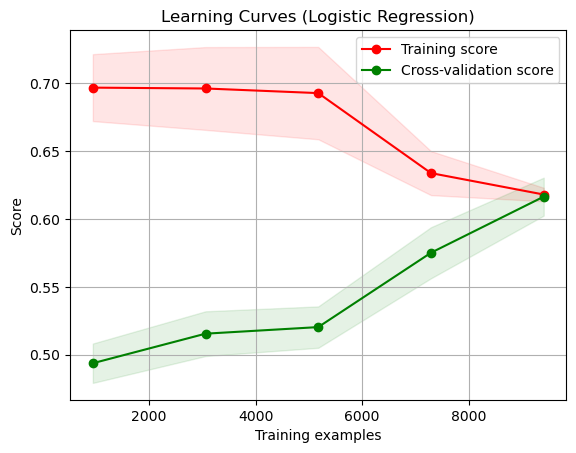

In [40]:
# Learning Curve
title = "Learning Curves (Logistic Regression)"
plot_learning_curve(logistic_model, title, X_train_resampled, y_train_resampled, cv=5, n_jobs=-1)
plt.show()

In [43]:
# Make predictions on test data and create submission DataFrame
test_predictions = logistic_model.predict(X_test_selected)
submission_df = pd.DataFrame({'tweet_id': df_test['tweet_id'], 'label': test_predictions})
submission_df.to_csv('submission.csv', index=False)

In [ ]:
# check for imbalanced data
class_counts = df_train['label'].value_counts()
print(f"Class Distribution: \n{class_counts}")

In [ ]:
# handle imbalanced data
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
# check if imbalance is significant
if len(class_counts) > 1:
    minority_class = class_counts.idxmin()
    majority_class = class_counts.idxmax()
    minority_count = class_counts[minority_class]
    majority_count = class_counts[majority_class]
    imbalance_ratio = minority_count / majority_count

    if imbalance_ratio < 0.1:  # Imbalance threshold (adjust as needed)
        print("Imbalanced data detected. Applying resampling technique...")

        # Resampling technique (choose between oversampling or undersampling)
        # Oversampling
        oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)
        X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)

        # Undersampling
        # undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
        # X_resampled, y_resampled = undersampler.fit_resample(X_train, y_train)

        # Update training data with resampled data
        X_train = X_resampled
        y_train = y_resampled

        print("Resampling completed.")

    else:
        print("No significant imbalance detected. Proceeding with the original data.")

else:
    print("Single class detected. No imbalance issue.")

In [ ]:
# importing libraries for feature selection and dimensionality reduction
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

###### check if feature selection or dimensionality reduction is needed
###### correlation

In [ ]:
# Exclude non-numeric columns (tweet_id and safe_text) before computing correlation matrix
#cols = ['label','agreement']
#cor_matrix = df_train[cols].corr()

# Visualize correlation matrix
#plt.figure(figsize=(10, 8))
#sns.heatmap(cor_matrix, annot=True, cmap='coolwarm', fmt=".2f")
#plt.title("Correlation Matrix")
#plt.show()

###### Feature Selection

In [ ]:
# save tweet_id column
tweet_id = df_train['tweet_id']

In [ ]:
# Drop the tweet_id column from the DataFrame
df_train.drop(columns=['tweet_id'], inplace=True)

In [ ]:
# we have to deal with the texts in safe_tweet
# import necessary library
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# preprocess text data
vectorizer = TfidfVectorizer(max_features=5000)
X_text = vectorizer.fit_transform(df_train['safe_text'])
Y_text = vectorizer.fit_transform(df_test['safe_text'])

In [ ]:
# Convert text data to DataFrame
X_text_df = pd.DataFrame(X_text.toarray(), columns=vectorizer.get_feature_names_out())
Y_text_df = pd.DataFrame(Y_text.toarray(), columns=vectorizer.get_feature_names_out())
X_text_df.head(2)

In [ ]:
Y_text_df.head(2)

In [ ]:
# Drop the original 'safe_text' column from the DataFrame
df_train.drop(columns=['safe_text'], inplace=True)

In [ ]:
# Concatenate the numerical features (if any) with the preprocessed text features
X = pd.concat([df_train.drop(columns=['label', 'agreement']), X_text_df], axis=1)
y = df_train['label']

In [ ]:
df_test = pd.concat([df_test.drop(columns=['safe_text']), Y_text_df], axis=1)

In [ ]:
df_test.head()

In [ ]:
X.head()

In [ ]:
# Feature Selection
# Select top k features using ANOVA F-value
selector = SelectKBest(score_func=f_classif, k=23)  # Adjust k as needed
X_selected = selector.fit_transform(X, y)

In [ ]:
# Get the selected feature indices
selected_indices = selector.get_support(indices=True)

# Print selected feature names (optional)
selected_feature_names = X.columns[selected_indices]
print("Selected Features:")
print(selected_feature_names)

In [ ]:
y

In [ ]:
# import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize and train the logistic regression model
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

In [ ]:
# Make predictions on the test set
y_pred = logistic_model.predict(X_test)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100)

In [ ]:
# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

In [ ]:
# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

In [ ]:
# check for overfittin gor underfitting
# importing necessary libraries
from sklearn.model_selection import learning_curve

In [ ]:
# function check for overfitting or underfitting
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    
    # Check for overfitting or underfitting
    diff_scores = train_scores_mean - test_scores_mean
    if np.any(diff_scores > 0):
        print("Yes, overfitting")
    elif np.any(diff_scores < 0):
        print("Yes, underfitting")
    else:
        print("No overfitting or underfitting")
    
    return plt

In [ ]:
# Plot learning curves
title = "Learning Curves (Logistic Regression)"
plot_learning_curve(logistic_model, title, X_train, y_train, cv=5, n_jobs=-1)

plt.show()

In [ ]:
# Drop 'tweet_id' from the test data
df_test.drop(columns=['tweet_id'], inplace=True)

In [ ]:
# Make predictions on the test data
test_predictions = logistic_model.predict(df_test)

In [ ]:
# Create a DataFrame for submission
submission_df = pd.DataFrame({'tweet_id': tweet_id, 'label': test_predictions})